In [271]:
# import the library

In [272]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sp
import matplotlib.ticker as ticker
import matplotlib.ticker as plticker
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn import preprocessing
from sklearn.ensemble import AdaBoostClassifier

In [273]:
#data collection

In [274]:
All_Results_1872To2018= pd.read_csv('Datasets/results.csv')
All_Results_1872To2018.head()

,date,home_team,away_team,home_score,away_score,tournament,city,country
0,1872-11-30,Scotland,England,0,0,Friendly,Glasgow,Scotland
1,1873-03-08,England,Scotland,4,2,Friendly,London,England
2,1874-03-07,Scotland,England,2,1,Friendly,Glasgow,Scotland
3,1875-03-06,England,Scotland,2,2,Friendly,London,England
4,1876-03-04,Scotland,England,3,0,Friendly,Glasgow,Scotland


In [275]:
# add the result in Table_cup2022_From_Table_1872_To_2018

In [276]:
Win= []
for i in range (len(All_Results_1872To2018['home_team'])):
    if All_Results_1872To2018 ['home_score'][i] > All_Results_1872To2018['away_score'][i]:
        Win.append(1)
    elif All_Results_1872To2018['home_score'][i] < All_Results_1872To2018 ['away_score'][i]:
        Win.append(-1)
    else:
        Win.append(0)
All_Results_1872To2018['results'] = Win
All_Results_1872To2018.tail()

,date,home_team,away_team,home_score,away_score,tournament,city,country,results
38897,2018-03-27,Mongolia,Mauritius,0,2,Friendly,Ulan Bator,Mongolia,-1
38898,2018-03-27,Seychelles,Swaziland,0,0,Friendly,Victoria,Seychelles,0
38899,2018-03-27,Kosovo,Burkina Faso,2,0,Friendly,Franconville,France,1
38900,2018-03-27,Iraq,Syria,1,1,Friendly,Basra,Iraq,0
38901,2018-04-01,Malaysia,Bhutan,7,0,Friendly,Kuala Lumpur,Malaysia,1


In [277]:
# insert new column in the data

In [278]:
Ranking= pd.read_csv('Datasets/fifa_rankings.csv')
All_Results_1872To2018.insert(1, 'Home_position', All_Results_1872To2018['home_team'].map(Ranking.set_index('Team')['Position']))

In [279]:
All_Results_1872To2018.tail()

,date,Home_position,home_team,away_team,home_score,away_score,tournament,city,country,results
38897,2018-03-27,188.0,Mongolia,Mauritius,0,2,Friendly,Ulan Bator,Mongolia,-1
38898,2018-03-27,195.0,Seychelles,Swaziland,0,0,Friendly,Victoria,Seychelles,0
38899,2018-03-27,152.0,Kosovo,Burkina Faso,2,0,Friendly,Franconville,France,1
38900,2018-03-27,89.0,Iraq,Syria,1,1,Friendly,Basra,Iraq,0
38901,2018-04-01,170.0,Malaysia,Bhutan,7,0,Friendly,Kuala Lumpur,Malaysia,1


In [283]:
#make new table with only the data for cup 2022

In [284]:
#narrowing to team patcipating in the world cup
cup2022_From_Data_1872_To_2018= ['Morocco', ' Argentina', 'Croatia', 'France']
FirstTeam= All_Results_1872To2018[All_Results_1872To2018['home_team'].isin(cup2022_From_Data_1872_To_2018)]
SecandTeam= All_Results_1872To2018[All_Results_1872To2018['away_team'].isin(cup2022_From_Data_1872_To_2018)]
Table_cup2022_From_Table_1872_To_2018 = pd.concat((FirstTeam, SecandTeam))
Table_cup2022_From_Table_1872_To_2018.drop_duplicates()

,date,Home_position,home_team,away_team,home_score,away_score,tournament,city,country,results
162,1905-02-12,7.0,France,Switzerland,1,0,Friendly,Paris,France,1
181,1906-04-22,7.0,France,Belgium,0,5,Friendly,Saint-Cloud,France,-1
211,1908-04-12,7.0,France,Belgium,1,2,Friendly,Colombes,France,-1
252,1910-04-03,7.0,France,Belgium,0,4,Friendly,Gentilly,France,-1
272,1911-01-01,7.0,France,Hungary,0,3,Friendly,Maisons-Alfort,France,-1
...,...,...,...,...,...,...,...,...,...,...
38678,2017-11-14,1.0,Germany,France,2,2,Friendly,Cologne,Germany,0
38798,2018-03-23,35.0,Serbia,Morocco,1,2,Friendly,Turin,Italy,-1
38807,2018-03-23,11.0,Peru,Croatia,2,0,Friendly,Miami Gardens,USA,1
38870,2018-03-27,66.0,Russia,France,1,3,Friendly,St Petersburg,Russia,-1


In [285]:
# split the data to tow groub the first one for (1/1/2014 to 4/1/2018) and the seacand one is (12/31/2013 to 1/1/1960)

In [286]:
year = []
for row in Table_cup2022_From_Table_1872_To_2018['date']:
    year.append(int(row[:4]))
Table_cup2022_From_Table_1872_To_2018['year'] = year
FirstTable_2013_1960_ = Table_cup2022_From_Table_1872_To_2018[(Table_cup2022_From_Table_1872_To_2018.year >= 1960) & (Table_cup2022_From_Table_1872_To_2018.year <= 2013)]
SecandTable_2014_2018_=Table_cup2022_From_Table_1872_To_2018[(Table_cup2022_From_Table_1872_To_2018.year >=2014) & (Table_cup2022_From_Table_1872_To_2018.year <= 2018)]
FirstTable_2013_1960_.head()


,date,Home_position,home_team,away_team,home_score,away_score,tournament,city,country,results,year
4583,1960-01-01,42.0,Morocco,Yugoslavia,0,5,Friendly,Casablanca,Morocco,-1,1960
4605,1960-03-16,7.0,France,Chile,6,0,Friendly,Paris,France,1,1960
4675,1960-07-06,7.0,France,Yugoslavia,4,5,UEFA Euro,Paris,France,-1,1960
4767,1960-10-30,42.0,Morocco,Tunisia,2,1,FIFA World Cup qualification,Casablanca,Morocco,1,1960
4789,1960-12-11,7.0,France,Bulgaria,3,0,FIFA World Cup qualification,Colombes,France,1,1960


In [287]:
SecandTable_2014_2018_.head()

,date,Home_position,home_team,away_team,home_score,away_score,tournament,city,country,results,year
35270,2014-01-20,42.0,Morocco,Uganda,3,1,African Nations Championship,Cape Town,South Africa,1,2014
35280,2014-01-25,42.0,Morocco,Nigeria,3,4,African Nations Championship,Cape Town,South Africa,-1,2014
35311,2014-03-05,7.0,France,Netherlands,2,0,Friendly,Saint-Denis,France,1,2014
35332,2014-03-05,42.0,Morocco,Gabon,1,1,Friendly,Marrakech,Morocco,0,2014
35421,2014-05-27,7.0,France,Norway,4,0,Friendly,Saint-Denis,France,1,2014


In [288]:
#data corrlation for the  All_Results_1960 to 2013 DATA 

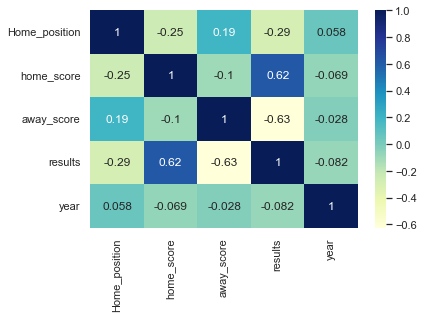

In [289]:
analyzing1960_2013=FirstTable_2013_1960_
analyzing1960_2013 = sp.heatmap(analyzing1960_2013.corr(), cmap="YlGnBu", annot=True)
plt.show()

In [290]:
# the data analysis 

In [291]:
# the data analysis 

In [292]:
# the data analysis 

In [293]:
# the data analysis 

In [294]:
# we need to delete the irrlevent featuers:(delete data,home_posstion,home_team,home score,away score,tournament,city,country,year)

In [295]:
FirstTable_2013_1960_=FirstTable_2013_1960_.drop(['date', 'home_score', 'away_score', 'tournament', 'city', 'country','year'], axis=1)
FirstTable_2013_1960_.tail()

,Home_position,home_team,away_team,results
34966,79.0,Belarus,France,-1
34984,61.0,Korea Republic,Croatia,-1
35094,34.0,Scotland,Croatia,1
35124,22.0,Iceland,Croatia,0
35141,30.0,Ukraine,France,1


In [296]:
# test the corrolation after delete the irrelvent features

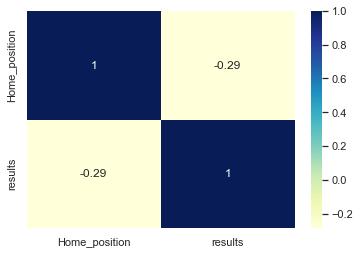

In [297]:
p1 = sp.heatmap(FirstTable_2013_1960_.corr(),cmap="YlGnBu", annot=True)

In [298]:
# the secand data (2014 to 2018)

In [299]:
# the corrlation in the secaned group pf data

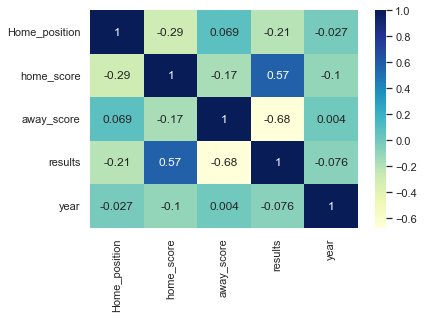

In [300]:
analyzing2014_2018=SecandTable_2014_2018_
analyzing2014_2018 = sp.heatmap(analyzing2014_2018.corr(), cmap="YlGnBu", annot=True)
plt.show()

In [301]:
# delete irrelvent data

In [302]:
SecandTable_2014_2018_=SecandTable_2014_2018_.drop(['date', 'home_score', 'away_score', 'tournament', 'city', 'country','year'], axis=1)
SecandTable_2014_2018_.head()

,Home_position,home_team,away_team,results
35270,42.0,Morocco,Uganda,1
35280,42.0,Morocco,Nigeria,-1
35311,7.0,France,Netherlands,1
35332,42.0,Morocco,Gabon,0
35421,7.0,France,Norway,1


In [303]:
 # the thierd data its for world cup 2022 only

In [304]:
All_Results_2022= pd.read_csv('Datasets/fifa_2022-1.csv')
All_Results_2022.head()

,date,team1,team2,team1_score,team2_score,tournament,city,country,team1_shots,team2_shots,team1_shotOntarget,team2_shotOntarget,team1_possession%,team2_possession%,team1_fouls,team2_fouls
0,22/11/2022,Argentina,Saudi Arabia,1,2,FIFA World Cup qualification,Lusail Stadium,Qatar,15,3,6,2,70,30,7,21
1,22/11/2022,France,Australia,4,1,FIFA World Cup qualification,Al Janoub Stadium,Qatar,23,4,7,1,63,37,5,11
2,23/11/2022,Morocco,Croatia,0,0,FIFA World Cup qualification,Al Bayt Stadium,Qatar,8,5,2,2,35,65,16,11
3,26/11/2022,France,Denmark,2,1,FIFA World Cup qualification,Stadium 974,Qatar,21,10,7,2,48,52,4,9
4,26/11/2022,Argentina,Mexico,2,0,FIFA World Cup qualification,Lusail Stadium,Qatar,5,4,2,1,59,41,15,19


In [305]:
# put new column(results) in the table

In [306]:
Win2022= []
for i in range (len(All_Results_2022['team1'])):
    if All_Results_2022 ['team1_score'][i] > All_Results_2022['team2_score'][i]:
        Win2022.append(1)
    elif All_Results_2022['team1_score'][i] < All_Results_2022['team2_score'][i]:
        Win2022.append(-1)
    else:
        Win2022.append(0)
All_Results_2022['results'] = Win2022
All_Results_2022.tail()

,date,team1,team2,team1_score,team2_score,tournament,city,country,team1_shots,team2_shots,team1_shotOntarget,team2_shotOntarget,team1_possession%,team2_possession%,team1_fouls,team2_fouls,results
16,9/12/2022,Netherlands,Argentina,3,4,FIFA World Cup qualification,Lusail Stadium,Qatar,6,14,2,5,52,48,30,18,-1
17,10/12/2022,Morocco,Portugal,1,0,FIFA World Cup qualification,Al Thumama Stadium,Qatar,9,12,3,3,26,74,15,9,1
18,10/12/2022,England,France,1,2,FIFA World Cup qualification,Al Bayt Stadium,Qatar,16,8,8,5,58,42,10,14,-1
19,13/12/2022,Argentina,Croatia,3,0,FIFA World Cup qualification,Lusail Stadium,Qatar,9,12,7,2,39,61,15,8,1
20,14/12/2022,France,Morocco,2,0,FIFA World Cup qualification,Al Bayt Stadium,Qatar,14,13,3,3,38,62,11,11,1


In [307]:
# cleaning data
# 1-we take tge ratio for the shotOntarget/shots *10 

In [308]:
shotsRatioteam1=[]
shotsRatioteam2=[]
for i in range (len(All_Results_2022['team1'])):
    shotsRatioteam1.append((All_Results_2022['team1_shotOntarget'][i]/All_Results_2022['team1_shots'][i])*10)
    shotsRatioteam2.append((All_Results_2022['team2_shotOntarget'][i]/All_Results_2022['team2_shots'][i])*10) 
All_Results_2022['shotsRatioteam1'] = shotsRatioteam1
All_Results_2022['shotsRatioteam2'] = shotsRatioteam2

In [309]:
All_Results_2022.tail()

,date,team1,team2,team1_score,team2_score,tournament,city,country,team1_shots,team2_shots,team1_shotOntarget,team2_shotOntarget,team1_possession%,team2_possession%,team1_fouls,team2_fouls,results,shotsRatioteam1,shotsRatioteam2
16,9/12/2022,Netherlands,Argentina,3,4,FIFA World Cup qualification,Lusail Stadium,Qatar,6,14,2,5,52,48,30,18,-1,3.333333,3.571429
17,10/12/2022,Morocco,Portugal,1,0,FIFA World Cup qualification,Al Thumama Stadium,Qatar,9,12,3,3,26,74,15,9,1,3.333333,2.500000
18,10/12/2022,England,France,1,2,FIFA World Cup qualification,Al Bayt Stadium,Qatar,16,8,8,5,58,42,10,14,-1,5.000000,6.250000
19,13/12/2022,Argentina,Croatia,3,0,FIFA World Cup qualification,Lusail Stadium,Qatar,9,12,7,2,39,61,15,8,1,7.777778,1.666667
20,14/12/2022,France,Morocco,2,0,FIFA World Cup qualification,Al Bayt Stadium,Qatar,14,13,3,3,38,62,11,11,1,2.142857,2.307692


In [310]:
# the corllation for the data :

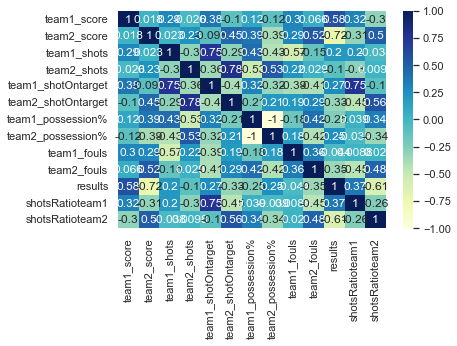

In [311]:
analyzing2022=All_Results_2022
analyzing2022 = sp.heatmap(analyzing2022.corr(), cmap="YlGnBu", annot=True)
plt.show()

In [312]:
# so we delete the irrlevent features:(team1_score,team2_score,team1_shotOntarget,team2_Ontarget,date,tournament,city,country)

In [313]:
All_Results_2022=All_Results_2022.drop(['date', 'team1_score', 'team2_score','team1_shotOntarget','team2_shotOntarget','tournament', 'city', 'country','team1_possession%','team2_possession%'], axis=1)
All_Results_2022.head()

,team1,team2,team1_shots,team2_shots,team1_fouls,team2_fouls,results,shotsRatioteam1,shotsRatioteam2
0,Argentina,Saudi Arabia,15,3,7,21,-1,4.000000,6.666667
1,France,Australia,23,4,5,11,1,3.043478,2.500000
2,Morocco,Croatia,8,5,16,11,0,2.500000,4.000000
3,France,Denmark,21,10,4,9,1,3.333333,2.000000
4,Argentina,Mexico,5,4,15,19,1,4.000000,2.500000


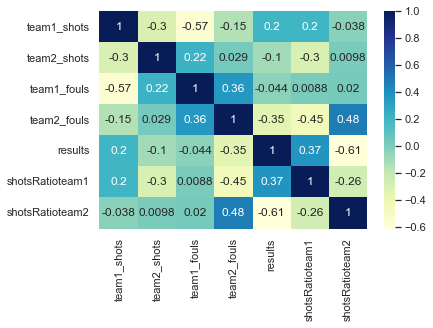

In [314]:
analyzing2022_=All_Results_2022
analyzing2022_= sp.heatmap(analyzing2022_.corr(), cmap="YlGnBu", annot=True)
plt.show()

In [315]:
# lets take sample to see the data of Morocco for the 2022


In [316]:
sample = All_Results_2022[(All_Results_2022['team1'] =='Morocco') | (All_Results_2022['team2'] =='Morocco')]
Morocco = sample.iloc[:]
Morocco.head()

,team1,team2,team1_shots,team2_shots,team1_fouls,team2_fouls,results,shotsRatioteam1,shotsRatioteam2
2,Morocco,Croatia,8,5,16,11,0,2.500000,4.000000
5,Belgium,Morocco,10,10,10,14,-1,3.000000,4.000000
10,Canada,Morocco,5,6,14,14,-1,0.000000,3.333333
14,Morocco,Spain,6,13,15,14,1,3.333333,0.769231
17,Morocco,Portugal,9,12,15,9,1,3.333333,2.500000


<AxesSubplot:xlabel='Results', ylabel='count'>

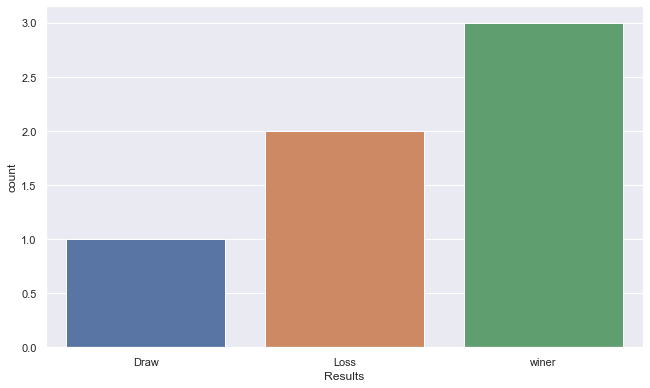

In [317]:
Moroccolist = []
for row in Morocco['results']:
    if row == -1:
        Moroccolist.append('Loss')
    elif row==1:
        Moroccolist.append('winer')
    elif row==0:
        Moroccolist.append('Draw')    
        
Moroccofile= pd.DataFrame(Moroccolist, columns=[ 'Results'])
fig, ax = plt.subplots(1)
fig.set_size_inches(10.7, 6.27)
sp.set(style='darkgrid')
sp.countplot(x='Results', data=Moroccofile)

In [318]:
# we need to see moroco for the data from 1960 to 2013

In [319]:
sample = FirstTable_2013_1960_ [(FirstTable_2013_1960_ ['home_team'] =='Morocco') | (FirstTable_2013_1960_ ['away_team'] =='Morocco')]
Morocco = sample.iloc[:]
Morocco.head()

,Home_position,home_team,away_team,results
4583,42.0,Morocco,Yugoslavia,-1
4767,42.0,Morocco,Tunisia,1
4790,42.0,Morocco,German DR,-1
4804,42.0,Morocco,Tunisia,0
4874,42.0,Morocco,Ghana,1


<AxesSubplot:xlabel='Results', ylabel='count'>

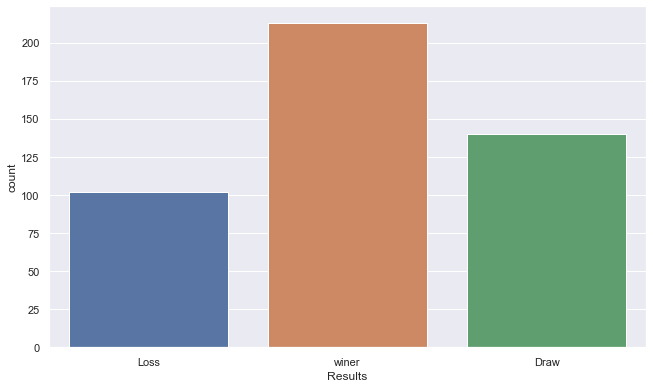

In [320]:
Moroccolist = []
for row in Morocco['results']:
    if row == -1:
        Moroccolist.append('Loss')
    elif row==1:
        Moroccolist.append('winer')
    elif row==0:
        Moroccolist.append('Draw')    
        
Moroccofile= pd.DataFrame(Moroccolist, columns=[ 'Results'])
fig, ax = plt.subplots(1)
fig.set_size_inches(10.7, 6.27)
sp.set(style='darkgrid')
sp.countplot(x='Results', data=Moroccofile)

In [321]:
# see the data of moroco from 2013 to 2018

In [322]:
sample = SecandTable_2014_2018_[(SecandTable_2014_2018_['home_team'] =='Morocco') | (SecandTable_2014_2018_['away_team'] =='Morocco')]
Morocco = sample.iloc[:]
Morocco.head()

,Home_position,home_team,away_team,results
35270,42.0,Morocco,Uganda,1
35280,42.0,Morocco,Nigeria,-1
35332,42.0,Morocco,Gabon,0
35652,42.0,Morocco,Qatar,0
35709,42.0,Morocco,Libya,1


<AxesSubplot:xlabel='Results', ylabel='count'>

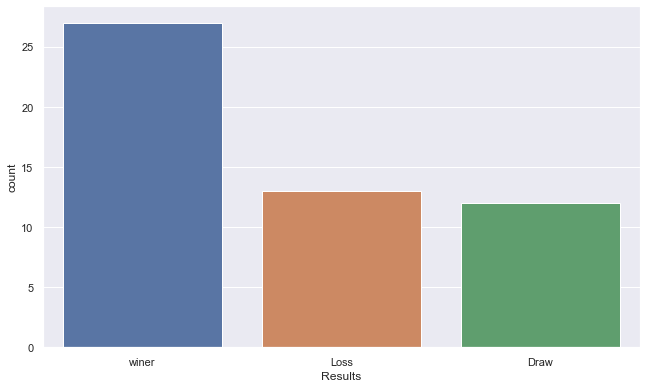

In [323]:
Moroccolist = []
for row in Morocco['results']:
    if row == -1:
        Moroccolist.append('Loss')
    elif row==1:
        Moroccolist.append('winer')
    elif row==0:
        Moroccolist.append('Draw')    
        
Moroccofile= pd.DataFrame(Moroccolist, columns=[ 'Results'])
fig, ax = plt.subplots(1)
fig.set_size_inches(10.7, 6.27)
sp.set(style='darkgrid')
sp.countplot(x='Results', data=Moroccofile)

In [324]:
# the first data:

In [325]:
#convert home team and away team from categorical variables to continous inputs 
# Get dummy variables
final = pd.get_dummies(SecandTable_2014_2018_, prefix=['home_team', 'away_team'], columns=['home_team', 'away_team'])
final.info()
final.describe()
final.isnull()
final.isnull().sum().sum()
final.dropna(inplace=True)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 154 entries, 35270 to 38875
Columns: 122 entries, Home_position to away_team_Zimbabwe
dtypes: float64(1), int64(1), uint8(120)
memory usage: 21.7 KB


In [326]:
# Separate X and y sets
X = final.drop(['results'], axis=1)
y = final["results"]
y = y.astype('int')
# Separate train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=42)

In [327]:
logreg = LogisticRegression()
logreg.fit(X_train, y_train)
score = logreg.score(X_train, y_train)
score2 = logreg.score(X_test, y_test)
print("Training set accuracy: ", '%.3f'%(score))
print("Test set accuracy: ", '%.3f'%(score2))

Training set accuracy:  0.848
Test set accuracy:  0.556


C:\Users\Asus\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [328]:
Final2022= pd.read_csv('Datasets/final.csv')
Final2022_noUpdate=Final2022

In [329]:
Final2022.head()

,team1,team2
0,Morocco,Croatia
1,France,Argentina


In [330]:
Final2022 = pd.get_dummies(Final2022, prefix=['team1', 'team2'], columns=['team1', 'team2'])
missing_cols = set(final.columns) - set(Final2022.columns)
for c in missing_cols:
    Final2022[c] = 0
Final2022 = Final2022[final.columns]
# Remove winning team column
Final2022.head()

C:\Users\Asus\AppData\Local\Temp\ipykernel_26508\961590874.py:4: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  Final2022[c] = 0
C:\Users\Asus\AppData\Local\Temp\ipykernel_26508\961590874.py:4: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  Final2022[c] = 0
C:\Users\Asus\AppData\Local\Temp\ipykernel_26508\961590874.py:4: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) inste

,Home_position,results,home_team_Albania,home_team_Angola,home_team_Argentina,home_team_Armenia,home_team_Azerbaijan,home_team_Belarus,home_team_Brazil,home_team_Bulgaria,...,away_team_Sweden,away_team_Togo,away_team_Tunisia,away_team_Turkey,away_team_Uganda,away_team_Ukraine,away_team_Uruguay,away_team_Uzbekistan,away_team_Wales,away_team_Zimbabwe
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [331]:
Final2022 = Final2022.drop(['results'], axis=1)

In [332]:
#group matches 
predictions = logreg.predict(Final2022)
for i in range(Final2022_noUpdate.shape[0]):
    print(Final2022_noUpdate.iloc[i, 1] + " and " + Final2022_noUpdate.iloc[i, 0])
    if predictions[i] ==1:
        print("Winner: " + Final2022_noUpdate.iloc[i, 1])
    elif predictions[i] ==0:
        print("Draw")
    elif predictions[i] ==-1:
        print("Winner: " + Final2022_noUpdate.iloc[i, 0])
    print('Probability of ' + Final2022_noUpdate.iloc[i, 1] + 'winning: ', '%.3f'%(logreg.predict_proba(Final2022)[i][2]))
    Probability_of_Croatia_winning_2013_2018=(logreg.predict_proba(Final2022)[i][2])
    Probability_of_Morocco_winning_2013_2018=(logreg.predict_proba(Final2022)[i][0])
    Probability_of_Drow_2013_2018=(logreg.predict_proba(Final2022)[i][1])
    print('Probability of Draw: ', '%.3f'%(logreg.predict_proba(Final2022)[i][1]))
    print('Probability of ' + Final2022_noUpdate.iloc[i, 0] + ' winning: ', '%.3f'%(logreg.predict_proba(Final2022)[i][0]))
    print("")

Croatia and Morocco
Winner: Croatia
Probability of Croatiawinning:  0.670
Probability of Draw:  0.197
Probability of Morocco winning:  0.133

Argentina and France
Winner: Argentina
Probability of Argentinawinning:  0.670
Probability of Draw:  0.197
Probability of France winning:  0.133



In [333]:
#for the secand data -->1960 t0 2013

In [334]:
#convert home team and away team from categorical variables to continous inputs 
# Get dummy variables
final2= pd.get_dummies(FirstTable_2013_1960_, prefix=['home_team', 'away_team'], columns=['home_team', 'away_team'])
final2.info()
final2.describe()
final2.isnull()
final2.isnull().sum().sum()
final2.dropna(inplace=True)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1192 entries, 4583 to 35141
Columns: 243 entries, Home_position to away_team_Zimbabwe
dtypes: float64(1), int64(1), uint8(241)
memory usage: 308.5 KB


In [335]:
# Separate X and y sets
X2 = final2.drop(['results'], axis=1)
y2 = final2["results"]
y2 = y2.astype('int')
# Separate train and test sets
X2_train, X2_test, y2_train, y2_test = train_test_split(X2, y2, test_size=0.30, random_state=42)

In [336]:
logreg2 = LogisticRegression()
logreg2.fit(X2_train, y2_train)
r1 = logreg2.score(X2_train, y2_train)
r2 = logreg2.score(X2_test, y2_test)
print("Training set accuracy: ", '%.3f'%(r1))
print("Test set accuracy: ", '%.3f'%(r2))

Training set accuracy:  0.625
Test set accuracy:  0.541


C:\Users\Asus\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [337]:
Final2022_2= pd.read_csv('Datasets/final.csv')
Final2022_noUpdate_2=Final2022_2

In [338]:
Final2022_2.head()

,team1,team2
0,Morocco,Croatia
1,France,Argentina


In [339]:
Final2022_2 = pd.get_dummies(Final2022_2, prefix=['team1', 'team2'], columns=['team1', 'team2'])
missing_cols = set(final2.columns) - set(Final2022_2.columns)
for c in missing_cols:
    Final2022_2[c] = 0
Final2022_2 = Final2022_2[final2.columns]
# Remove winning team column
Final2022_2.head()

C:\Users\Asus\AppData\Local\Temp\ipykernel_26508\1021012954.py:4: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  Final2022_2[c] = 0
C:\Users\Asus\AppData\Local\Temp\ipykernel_26508\1021012954.py:4: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  Final2022_2[c] = 0
C:\Users\Asus\AppData\Local\Temp\ipykernel_26508\1021012954.py:4: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1

,Home_position,results,home_team_Albania,home_team_Algeria,home_team_Andorra,home_team_Angola,home_team_Argentina,home_team_Armenia,home_team_Australia,home_team_Austria,...,away_team_Tunisia,away_team_Turkey,away_team_USA,away_team_Uganda,away_team_Ukraine,away_team_Uruguay,away_team_Wales,away_team_Yugoslavia,away_team_Zambia,away_team_Zimbabwe
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [340]:
Final2022_2 = Final2022_2.drop(['results'], axis=1)

In [341]:
#group matches 
predictions2 = logreg2.predict(Final2022_2)
for i in range(Final2022_noUpdate_2.shape[0]):
    print(Final2022_noUpdate_2.iloc[i, 1] + " and " + Final2022_noUpdate_2.iloc[i, 0])
    if predictions2[i] ==1:
        print("Winner: " + Final2022_noUpdate_2.iloc[i, 1])
    elif predictions2[i] ==0:
        print("Draw")
    elif predictions2[i] ==-1:
        print("Winner: " + Final2022_noUpdate_2.iloc[i, 0])
    print('Probability of ' + Final2022_noUpdate_2.iloc[i, 1] + 'winning: ', '%.3f'%(logreg2.predict_proba(Final2022_2)[i][2]))
    print('Probability of Draw: ', '%.3f'%(logreg2.predict_proba(Final2022_2)[i][1]))
    print('Probability of ' + Final2022_noUpdate_2.iloc[i, 0] + ' winning: ', '%.3f'%(logreg2.predict_proba(Final2022_2)[i][0]))


Croatia and Morocco
Winner: Croatia
Probability of Croatiawinning:  0.639
Probability of Draw:  0.197
Probability of Morocco winning:  0.164
Argentina and France
Winner: Argentina
Probability of Argentinawinning:  0.639
Probability of Draw:  0.197
Probability of France winning:  0.164


In [342]:
#for the third data -->2022

In [343]:
#convert home team and away team from categorical variables to continous inputs 
# Get dummy variables
final3 = pd.get_dummies(All_Results_2022 , prefix=['team1', 'team2'], columns=['team1', 'team2'])
final3.info()
final3.describe()
final3.isnull()
final3.isnull().sum().sum()
final3.dropna(inplace=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21 entries, 0 to 20
Data columns (total 32 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   team1_shots         21 non-null     int64  
 1   team2_shots         21 non-null     int64  
 2   team1_fouls         21 non-null     int64  
 3   team2_fouls         21 non-null     int64  
 4   results             21 non-null     int64  
 5   shotsRatioteam1     21 non-null     float64
 6   shotsRatioteam2     21 non-null     float64
 7   team1_Argentina     21 non-null     uint8  
 8   team1_Belgium       21 non-null     uint8  
 9   team1_Canada        21 non-null     uint8  
 10  team1_Croatia       21 non-null     uint8  
 11  team1_England       21 non-null     uint8  
 12  team1_France        21 non-null     uint8  
 13  team1_Japan         21 non-null     uint8  
 14  team1_Morocco       21 non-null     uint8  
 15  team1_Netherlands   21 non-null     uint8  
 16  team1_Pola

In [344]:
# Separate X and y sets
X3= final3.drop(['results'], axis=1)
y3 = final3["results"]
y3 = y3.astype('int')
X3_train, X3_test, y3_train, y3_test = train_test_split(X3, y3, test_size=0.30, random_state=42)

In [345]:
logreg3 = LogisticRegression()
logreg3.fit(X3_train, y3_train)
r3 = logreg3.score(X3_train, y3_train)
r4 = logreg3.score(X3_test, y3_test)
print("Training set accuracy: ", '%.3f'%(r3))
print("Test set accuracy: ", '%.3f'%(r4))

C:\Users\Asus\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Training set accuracy:  1.000
Test set accuracy:  0.857


In [346]:
Final2022_3= pd.read_csv('Datasets/final.csv')
Final2022_noUpdate_3=Final2022_3

In [347]:
Final2022_3= pd.get_dummies(Final2022_3, prefix=['team1', 'team2'], columns=['team1', 'team2'])
missing_cols = set(final3.columns) - set(Final2022_3.columns)
for c in missing_cols:
    Final2022_3[c] = 0
Final2022_3= Final2022_3[final3.columns]
# Remove winning team column
Final2022_3.head()

,team1_shots,team2_shots,team1_fouls,team2_fouls,results,shotsRatioteam1,shotsRatioteam2,team1_Argentina,team1_Belgium,team1_Canada,...,team2_Canada,team2_Croatia,team2_Denmark,team2_France,team2_Mexico,team2_Morocco,team2_Poland,team2_Portugal,team2_Saudi Arabia,team2_Spain
0,0,0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [348]:
Final2022_3 = Final2022_3.drop(['results'], axis=1)

In [371]:
#group matches 
predictions3= logreg3.predict(Final2022_3)
for i in range(Final2022_noUpdate_3.shape[0]):
    print(Final2022_noUpdate_3.iloc[i, 1] + " and " + Final2022_noUpdate_3.iloc[i, 0])
    if predictions3[i] ==1:
        print("Winner: " + Final2022_noUpdate_3.iloc[i, 1])
    elif predictions3[i] ==0:
        print("Draw")
    elif predictions3[i]==-1:
        print("Winner: " + Final2022_noUpdate_3.iloc[i, 0])
    print('Probability of ' + Final2022_noUpdate_3.iloc[i, 1] + 'winning: ', '%.3f'%(logreg3.predict_proba(Final2022_3)[i][2]))
    print('Probability of Draw: ', '%.3f'%(logreg3.predict_proba(Final2022_3)[i][1]))
    print('Probability of ' + Final2022_noUpdate_3.iloc[i, 0] + ' winning: ', '%.3f'%(logreg3.predict_proba(Final2022_3)[i][0]))  
    print("")

Croatia and Morocco
Draw
Probability of Croatiawinning:  0.088
Probability of Draw:  0.912
Probability of Morocco winning:  0.000
0.08755136084736662
6.006799720938175e-07

Argentina and France
Draw
Probability of Argentinawinning:  0.358
Probability of Draw:  0.642
Probability of France winning:  0.000
0.08755136084736662
6.006799720938175e-07



In [350]:
# now we need to take the avarge for all three data and put the weight -->we put the weight for the 2022 data =0.5,weight for 2014-2018=0.3,weight for 1960-2013=0.2

In [367]:
crotiawin=((0.088*0.5)+(0.67*0.3)+(0.639*0.2))
print("Probability of Croatia winnin")
print(crotiawin)
morocowin=((0.00*0.5)+(0.164*0.2)+(0.133*0.3))
print("Probability of Morocco winnin")
print(morocowin)
print("____________________________________________")

Argentinawinning=((0.358*0.5)+(0.67*0.3)+(0.636*0.2))
print("Probability of Argentina winnin")
print(Argentinawinning)
Francewin=(0+(0.164*0.2)+(0.133*0.3))
print("Probability of France  winnin")
print(Francewin)
print("_______________the resule___________________")

if crotiawin>morocowin:
    print("Croatia win")
else:
     print("Moroccowin")
if Argentinawinning>Francewin:
    print("Argentina win")
else:
     print("France  win")

    

Probability of Croatia winnin
0.3728
Probability of Morocco winnin
0.0727
____________________________________________
Probability of Argentina winnin
0.5072
Probability of France  winnin
0.0727
_______________the resule___________________
Croatia win
Argentina win
